# **Reservoir Geomechanics**
## Homework No. 1 – Overburden Stress and Porosity

In this homework, you will be calculating the vertical stress (overburden stress) and porosity
using two different datasets, one from a well in the Barnett shale in Texas, and the other from a
well in the Gulf of Mexico (GOM). Both datasets will be used in future homework assignments.
Utilize Matlab (recommended) or Excel for calculation and answer the questions below. Both
datasets can be downloaded by clicking the right tab on the top of this page.
Use the following units in your calculation: ‘ft’ for depth, ‘g/cm3 ’ for density, ‘psi’ for overburden
stress and pore pressure, and ‘psi/ft’ for overburden stress gradient and pore pressure gradient.
### I. Compute the overburden stress and the overburden gradient

1. Make a plot of density versus depth
• Barnett data – assume a reasonable surface density 1.8778 g/cm3 to extrapolate to the
first measurement point.
• GOM data – use a density of 1.0 g/cm3 from the surface to the sea floor (depth of 1000
ft) and a formation density of 1.7 g/cm3 at the sea floor. Linearly interpolate the density
between the sea floor and the depth at which the data starts (at the depth of 3515 ft).

2. “Block” the log into 5 depth units by assuming an approximately constant density over a
given range of depths. Compute and plot the averaged density in each block and your
blocked density as a function of depth for each dataset.

3. Calculate and plot the overburden stress as a function of depth using both the “blocked”
log and the continuous densities for each dataset. On the same plot, show hydrostatic
pore pressure 0.44 psi/ft versus depth as a reference. Use 9.8 m/s2 to approximate g, the
acceleration due to gravity.

4. Calculate the overburden gradient (overburden stress divided by the depth) for each data
set using the continuous density data. Plot the overburden gradient versus depth.

### II. Compute porosity from the density measurements
Use the continuous density data and the formula rb = (1 - f) r matrix + f r fluid to compute porosity
assuming full saturation of 1.0 g/cm3 water in the pores. Here f is the porosity. For r matrix , assume 2.7 g/cm 3 , which is a reasonable value for a mixture of qtz, feldspar, mica and clay. Plot porosity
as a function of depth for each dataset.

### III. Answer the questions on the page below
Use the calculations from I and II to answer the questions on the page below. The answers will
be posted a day after it is due. Numerical entry-type responses have a range of acceptable values
and are graded electronically, so please adhere to the value of constants given here. We will
specify the units that we want the answer in, so please do not write units in the answer, just write
the number.

# Loading Data

We will try to use Python for this task, as we already have a code in MatLab that solves the entire problem. We will start by connecting to the Google Drive unit and loading the data into some arrays.


In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The data sets we are going to work with are GulfMexico.dat and barnettSh.dat

In [187]:
gulfMexicoData = pd.read_csv('/content/drive/MyDrive/Reservoir Geomechanics Python/GulfMexico1.dat',sep='\t')
barnettData = pd.read_csv('/content/drive/MyDrive/Reservoir Geomechanics Python/barnettSh1.dat',sep='\t')

columnas = {'Depth(ft)':'Depth','Density (g/cc)':'Density'}
barnettData = barnettData.rename(columns=columnas)
gulfMexicoData = gulfMexicoData.rename(columns=columnas)

gulfMexicoData
barnettData

,Depth,Density
0,100.5,1.8778
1,101.0,1.8709
2,101.5,1.8317
3,102.0,1.8363
4,102.5,1.8500
...,...,...
12192,6196.5,NaN
12193,6197.0,NaN
12194,6197.5,NaN
12195,6198.0,NaN


# Computing overburden stress and overburden gradient

We complete the data according to what's stated in the incise 1 "...Barnett data – assume a reasonable surface density 1.8778 g/cm3 to extrapolate to the first measurement point. • GOM data – use a density of 1.0 g/cm3 from the surface to the sea floor (depth of 1000 ft) and a formation density of 1.7 g/cm3 at the sea floor. Linearly interpolate the density between the sea floor and the depth at which the data starts (at the depth of 3515 ft)..."

In [188]:
#Working a bit in our Barnett data set

sampleSize = barnettData['Depth'][1] - barnettData['Depth'][0]
depthSteps = ((barnettData['Depth'][0]-sampleSize)/sampleSize) + 1 #from 0 to first -1
#lists initialization for iteration
depthC = list(range(0,int(depthSteps)))
densC = list(range(0,int(depthSteps)))
#Since the first measured point is the same as the assumed density, im filling
#the blanks with the same value of 1.8778
for depth in depthC:
  depthC[depth] = depthC[depth]/2
  densC[depth] = 1.8778
#I attach both lists to a dict which keys are the same as the DF we are working 
#with so I can handle it easier
dataDict = {'Depth':depthC,'Density':densC}
barnettData=pd.concat([pd.DataFrame(data=dataDict),barnettData],ignore_index=True)
barnettData[200:203] #Barnett Data is ready

,Depth,Density
200,100.0,1.8778
201,100.5,1.8778
202,101.0,1.8709


We do the same for GOM, but in this case we have 2 densities to attach

In [189]:
#Working a bit in our gulf of Mexico data set

sampleSize = gulfMexicoData['Depth'][1] - gulfMexicoData['Depth'][0]
depthSteps = ((gulfMexicoData['Depth'][0]-sampleSize)/sampleSize) + 1 #from 0 to first -1
#lists initialization for iteration
depthC = list(range(0,int(depthSteps)))
densC = list(range(0,int(depthSteps)))
#
for depth in depthC:
  if depthC[depth]<1000:
    densC[depth] = 1.0
  else:
    densC[depth] = densC[depth-1] + (1.7-1.0)/(3515-1000) 
#I attach both lists to a dict which keys are the same as the DF we are working 
#with so I can handle it easier
dataDict = {'Depth':depthC,'Density':densC}
pd.DataFrame(data=dataDict)
gulfMexicoData=pd.concat([pd.DataFrame(data=dataDict),gulfMexicoData],ignore_index=True)
#gulfMexicoData[999:1003]
gulfMexicoData[3514:3516] #gulf of Mexico Data is ready

,Depth,Density
3514,3514,1.700
3515,3515,2.154


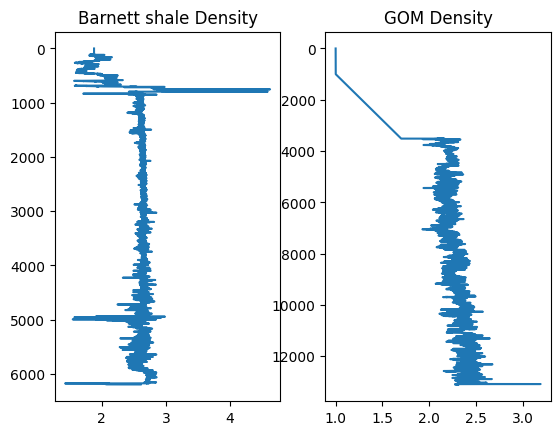

In [216]:
densityGraphs , (plot1,plot2) = plt.subplots(1, 2)

plot1.plot(barnettData['Density'],barnettData['Depth'])
plot1.set_title('Barnett shale Density')
plot1.invert_yaxis()

plot2.plot(gulfMexicoData['Density'],gulfMexicoData['Depth'])
plot2.set_title('GOM Density')
plot2.invert_yaxis()
plt.show()